In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import re

In [44]:
main = '/content/drive/MyDrive/RAG-DATA'

In [45]:
verses_english = pd.read_csv('/content/drive/MyDrive/RAG-DATA/Vedanta_Datasets/Bhagwad_Gita/Bhagwad_Gita_Verses_English.csv')

In [46]:
verses_english.head()

,Chapter,Verse,Speaker,Sanskrit,Swami Adidevananda,Swami Gambirananda,Swami Sivananda,Dr. S. Sankaranarayan,Shri Purohit Swami
0,1,1,धृतराष्ट्र,धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः| मा...,"Dhṛtarāṣṭra said: “O Sanjaya, what did my peop...","Dhṛtarāṣṭra said: O Sanjaya, what did my sons ...","Dhritarashtra said, ""What did my people and th...","Dhritarashtra said, ""O Sanjaya, what did my so...","The King Dhritarashtra asked, ""O Sanjaya! What..."
1,1,2,सञ्जय,दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर्योधनस्तदा| ...,"Sanjaya said: King Duryodhana, upon seeing the...","Sanjaya said: But then, seeing the army of the...",Sanjaya said: Having seen the army of the Pand...,Sanjaya said: Seeing the army of the sons of P...,"Sanjaya replied: ""When Prince Duryodhana saw t..."
2,1,3,सञ्जय,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम्| व्...,"Behold, O teacher, this mighty army of the Pan...","O teacher, behold this vast army of the sons o...","Behold, O Teacher! This mighty army of the son...",O teacher! Behold this mighty army of the sons...,Revered Father! Behold this mighty host of the...
3,1,4,सञ्जय,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि| युयुधान...,"There (in that army) are heroes, great bowmen,...","Here are the heroes wielding great bows, who i...","Here are heroes, mighty archers, equal in batt...","Here are the heroes and mighty archers, compar...",In it are heroes and great bowmen; the equals ...
4,1,5,सञ्जय,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान्| पुरु...,"Dhrstaketu, Cekitana, the valiant king of Kasi...","Dhrstaketu, Cekitana, and the valiant king of ...","Dhrishtaketu, Chekitana, the valiant king of K...","Dhrstaketu, Cekitana, the valorous king of Kas...","Dhrishtaketu, Chekitan, the valiant king of Be..."


In [47]:
verses_english['Speaker'].unique()

array(['धृतराष्ट्र', 'सञ्जय', 'अर्जुन', 'संजय', 'भगवान'], dtype=object)

In [48]:
len(verses_english)

700

In [49]:
verses_english.isnull().sum()

,0
Chapter,0
Verse,0
Speaker,0
Sanskrit,0
Swami Adidevananda,0
Swami Gambirananda,0
Swami Sivananda,0
Dr. S. Sankaranarayan,0
Shri Purohit Swami,0


In [50]:
concepts = pd.read_csv('/content/drive/MyDrive/RAG-DATA/Vedanta_Datasets/Bhagwad_Gita/Bhagwad_Gita_Verses_Concepts.csv')

In [51]:
concepts.head()

,Chapter,Verse,Concept,Keyword,Sanskrit,English
0,2,13,Transmigration of Soul,Transmigration,देहिनोऽस्मिन्यथा देहे कौमारं यौवनं जरा| तथा दे...,"Just as childhood, youth, and old age are natu..."
1,2,14,Impermanance of pleasure and pain,Transience,मात्रास्पर्शास्तु कौन्तेय शीतोष्णसुखदुःखदाः| आ...,"The sensations of cold and heat, pleasure and ..."
2,2,22,Transmigration of Soul,Transmigration,वासांसि जीर्णानि यथा विहाय नवानि गृह्णाति नरोऽ...,Just as a person discards old and tattered clo...
3,2,25,Characteristics of Soul,Soul,अव्यक्तोऽयमचिन्त्योऽयमविकार्योऽयमुच्यते| तस्मा...,"It is said that ""This"" is imperceptible, unima..."
4,2,27,Cycle of Birth and Death,Transmigration,जातस्य हि ध्रुवो मृत्युर्ध्रुवं जन्म मृतस्य च|...,The demise of every being born into this world...


In [52]:
len(concepts)

75

In [53]:
concepts.isnull().sum()

,0
Chapter,0
Verse,0
Concept,0
Keyword,0
Sanskrit,0
English,0


In [54]:
concepts['Concept'].unique()

array(['Transmigration of Soul', 'Impermanance of pleasure and pain',
       'Characteristics of Soul', 'Cycle of Birth and Death',
       'Equanimity', 'Sense Control', 'Sense control', 'Detachment',
       'Anger, Delusion', 'Equanimity, Sense control', 'Peace',
       'Importance of performing duty', 'Cause of Sin, Rajas, Anger',
       'Ignorance', "God's Incarnation (Avatar)", 'Salvation for sinners',
       'Faith and Peace', 'Superiority of Karma Yoga', 'Cause of Sorrow',
       'Definition of Yogi', 'Salvation',
       'Physical Preparation for Meditation', 'Meditation Posture',
       'Mental Preparation for Meditation', 'Reward of Meditation',
       'Importance of Moderation', 'Attributes of Meditative Mind',
       'Physical Nature (Prakriti)', 'Surrender', 'Om', "God's Function",
       'Devotion', 'Characteristics of Sattva',
       'Characteristics of Tamas', 'Characteristics of Gunas',
       "God's Nature", 'Demoniacal State', 'Hell', 'Sattvik Food',
       'Austerity 

In [55]:
concepts['Sanskrit'][10]

'ध्यायतो विषयान्पुंसः सङ्गस्तेषूपजायते| सङ्गात् संजायते कामः कामात्क्रोधोऽभिजायते || 2.62 ||  '

In [56]:
for i in range(len(verses_english)):
  for j in range(len(concepts)):
    if verses_english['Sanskrit '][i] == concepts['Sanskrit'][j]:
      print(f"Verse:{verses_english['Sanskrit '][i]}")
      print(f"Concept:{concepts['Concept'][j]}")
      print(f"English:{concepts['English'][j]}")
      print(f"Swami:{verses_english['Swami Sivananda'][i]}")
      print(f"Speaker:{verses_english['Speaker'][i]}")

Verse:देहिनोऽस्मिन्यथा देहे कौमारं यौवनं जरा| तथा देहान्तरप्राप्तिर्धीरस्तत्र न मुह्यति || 2.13 || 
Concept:Transmigration of Soul
English:Just as childhood, youth, and old age are natural stages for a living being in their current body, so too is the attainment of a new body. Therefore, a wise person is not deceived.
Swami:Just as the embodied soul passes through childhood, youth, and old age in this body, so too does it pass into another body; the steadfast one does not grieve over this.
Speaker:भगवान
Verse:वासांसि जीर्णानि यथा विहाय नवानि गृह्णाति नरोऽपराणि| तथा शरीराणि विहाय जीर्णा- न्यन्यानि संयाति नवानि देही || 2.22 || 
Concept:Transmigration of Soul
English:Just as a person discards old and tattered clothes and replaces them with new ones, similarly, after leaving behind an old and worn-out body, the embodied soul associates with a new body.
Swami:Just as a man casts off worn-out clothes and puts on new ones, so too the embodied Self casts off worn-out bodies and enters others t

In [57]:
count = 0
for i in range(len(verses_english)):
  if(verses_english['Speaker'][i] == 'सञ्जय'):
    count += 1
print(count)

36


In [58]:
count2 = 0
for i in range(len(verses_english)):
  if(verses_english['Speaker'][i] == 'संजय'):
    count2 += 1
print(count2)

4


In [59]:
verses_english['Speaker'] = verses_english['Speaker'].replace({
    'संजय': 'Sanjay',
    'सञ्जय': 'Sanjay',
    'अर्जुन': 'Arjun',
    'भगवान': 'Bhagwan',
    'धृतराष्ट्र': 'Dhritrashtra'
})

In [60]:
verses_english['Speaker'].unique()

array(['Dhritrashtra', 'Sanjay', 'Arjun', 'Bhagwan'], dtype=object)

On seeing the data of both the CSV's i have reached a conclusion that the CSV named Bhagwad_Gita_Verses_English is optimal for RAG.
Yes, after the pre-processing.

In [61]:
verses_english['Speaker'] = verses_english['Speaker'].str.strip()

In [62]:
chapter_chunks = verses_english.groupby('Chapter')
chapter_chunks.head()

,Chapter,Verse,Speaker,Sanskrit,Swami Adidevananda,Swami Gambirananda,Swami Sivananda,Dr. S. Sankaranarayan,Shri Purohit Swami
0,1,1,Dhritrashtra,धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः| मा...,"Dhṛtarāṣṭra said: “O Sanjaya, what did my peop...","Dhṛtarāṣṭra said: O Sanjaya, what did my sons ...","Dhritarashtra said, ""What did my people and th...","Dhritarashtra said, ""O Sanjaya, what did my so...","The King Dhritarashtra asked, ""O Sanjaya! What..."
1,1,2,Sanjay,दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर्योधनस्तदा| ...,"Sanjaya said: King Duryodhana, upon seeing the...","Sanjaya said: But then, seeing the army of the...",Sanjaya said: Having seen the army of the Pand...,Sanjaya said: Seeing the army of the sons of P...,"Sanjaya replied: ""When Prince Duryodhana saw t..."
2,1,3,Sanjay,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम्| व्...,"Behold, O teacher, this mighty army of the Pan...","O teacher, behold this vast army of the sons o...","Behold, O Teacher! This mighty army of the son...",O teacher! Behold this mighty army of the sons...,Revered Father! Behold this mighty host of the...
3,1,4,Sanjay,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि| युयुधान...,"There (in that army) are heroes, great bowmen,...","Here are the heroes wielding great bows, who i...","Here are heroes, mighty archers, equal in batt...","Here are the heroes and mighty archers, compar...",In it are heroes and great bowmen; the equals ...
4,1,5,Sanjay,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान्| पुरु...,"Dhrstaketu, Cekitana, the valiant king of Kasi...","Dhrstaketu, Cekitana, and the valiant king of ...","Dhrishtaketu, Chekitana, the valiant king of K...","Dhrstaketu, Cekitana, the valorous king of Kas...","Dhrishtaketu, Chekitan, the valiant king of Be..."
...,...,...,...,...,...,...,...,...,...
622,18,1,Arjun,संन्यासस्य महाबाहो तत्त्वमिच्छामि वेदितुम्| त्...,"Arjuna said, ""I desire to know the truth about...","Arjuna said, O mighty-armed Hrsikesa, O slayer...","Arjuna said, ""O mighty-armed Hrishikesa, I des...","Arjuna said, O Mighty-armed One! I desire to k...","Arjuna asked, ""O Mighty One! I desire to know ..."
623,18,2,Bhagwan,काम्यानां कर्मणां न्यासं संन्यासं कवयो विदुः| ...,"The Lord said, ""The sages hold that Sannyasa i...","The Blessed Lord said, ""The learned ones know ...","The Blessed Lord said, ""The sages understand s...","The Bhagavat said, ""The seers understand the a...",Lord Shri Krishna replied: The sages say that ...
624,18,3,Bhagwan,त्याज्यं दोषवदित्येके कर्म प्राहुर्मनीषिणः| यज...,Some sages say that all actions should be aban...,"Some learned persons say that action, beset wi...",Some philosophers declare that actions should ...,Certain wise men declare that the harmful acti...,Some philosophers say that all action is evil ...
625,18,4,Bhagwan,निश्चयं श्रृणु मे तत्र त्यागे भरतसत्तम| त्यागो...,"Listen to My decision, O Arjuna, concerning ab...",O the most excellent among the descendants of ...,Hear from Me the conclusion or the final truth...,O best of Bharata's descendants! Listen to My ...,O best of Indians! Listen to my judgment regar...


In [63]:
yse = pd.read_csv('/content/drive/MyDrive/RAG-DATA/Vedanta_Datasets/Patanjali_Yoga_Sutras/Patanjali_Yoga_Sutras_Verses_English.csv')
ysq = pd.read_csv('/content/drive/MyDrive/RAG-DATA/Vedanta_Datasets/Patanjali_Yoga_Sutras/Patanjali_Yoga_Sutras_Verses_English_Questions.csv')

In [64]:
yse.head()

,Chapter,Verse,Sanskrit,Word Meanings,Translation
0,1,1,अथ योगानुशासनम्,"अथ = now; योग = process of yoking, union; अनुश...","Now, the teachings of yoga are presented since..."
1,1,2,योगश्चित्तवृत्तिनिरोधः,"योग = process of yoking, union; चित्त = cons...",The purpose of yoga is to quieten the fluctuat...
2,1,3,तदा द्रष्टुः स्वरूपेऽवस्थानम्,"तदा = then; द्रष्टु = seer, witness, pure aw...","Once the state of Yoga is achieved, pure consc..."
3,1,4,वृत्तिसारूप्यमितरत्र,"वृत्ति = patterning, turnings, movements; सारू...","Till the state of Yoga is achieved, consciousn..."
4,1,5,वृत्तयः पञ्चतय्यः क्लिष्टाक्लिष्टाः,"वृत्तयः = patterning, turnings, movements; पञ्...",These mental patterns can be classified into f...


In [65]:
ysq.head()

,chapter,verse,sanskrit,translation,question
0,1,1,अथ योगानुशासनम्,"Now, the teachings of yoga are presented since...",When does Yoga commence? When should I start d...
1,1,2,योगश्चित्तवृत्तिनिरोधः,The purpose of yoga is to quieten the fluctuat...,What is the purpose of Yoga?
2,1,3,तदा द्रष्टुः स्वरूपेऽवस्थानम्,"Once the state of Yoga is achieved, pure consc...",What is the end result of Yoga practice?
3,1,4,वृत्तिसारूप्यमितरत्र,"Till the state of Yoga is achieved, consciousn...",What is the usual state of our awareness? How ...
4,1,5,वृत्तयः पञ्चतय्यः क्लिष्टाक्लिष्टाः,These mental patterns can be classified into f...,What are the different types of thoughts? How ...


In [66]:
print(f"Verses in English Yoga Sutras: {len(yse)}")
print(f"Questions in English Yoga Sutras: {len(ysq)}")

Verses in English Yoga Sutras: 195
Questions in English Yoga Sutras: 195


In [67]:
yse.isnull().sum()

,0
Chapter,0
Verse,0
Sanskrit,0
Word Meanings,0
Translation,0


In [68]:
ysq.isnull().sum()

,0
chapter,0
verse,0
sanskrit,0
translation,0
question,0


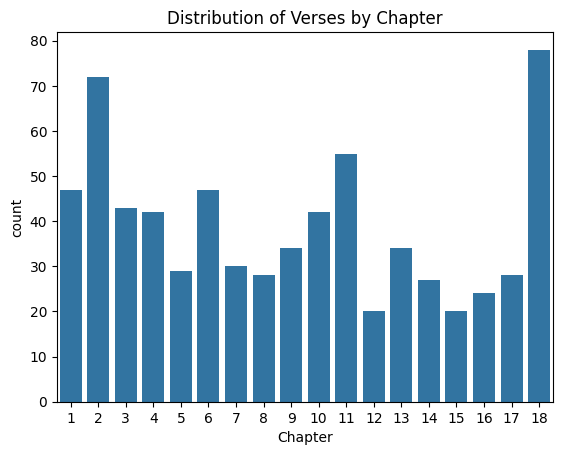

In [69]:
sns.countplot(data=verses_english, x='Chapter')
plt.title('Distribution of Verses by Chapter')
plt.show()

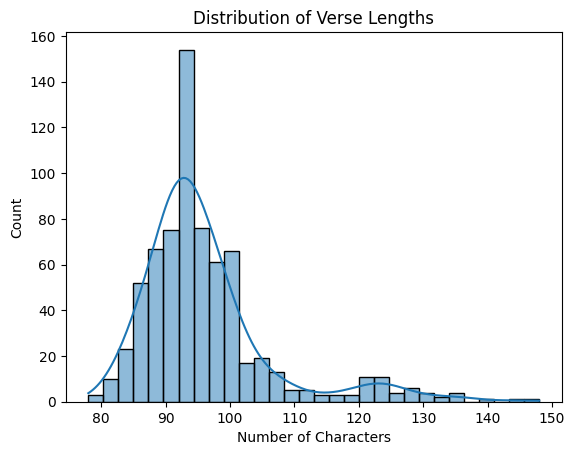

In [70]:
sns.histplot(verses_english['Sanskrit '].str.len(), kde=True, bins=30)
plt.title('Distribution of Verse Lengths')
plt.xlabel('Number of Characters')
plt.show()

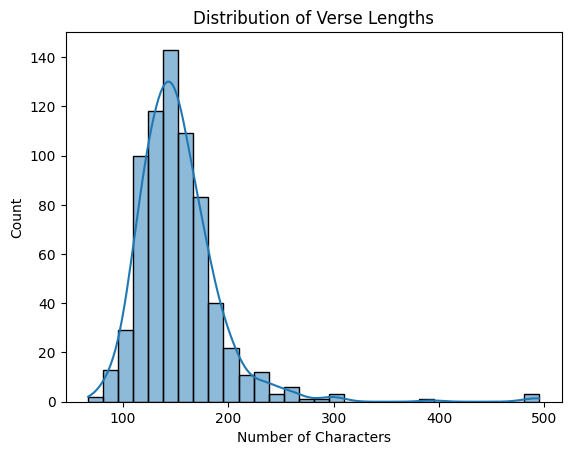

In [71]:
sns.histplot(verses_english['Swami Adidevananda'].str.len(), kde=True, bins=30)
plt.title('Distribution of Verse Lengths')
plt.xlabel('Number of Characters')
plt.show()

Speaker distribution:
 Speaker
Bhagwan         574
Arjun            85
Sanjay           40
Dhritrashtra      1
Name: count, dtype: int64


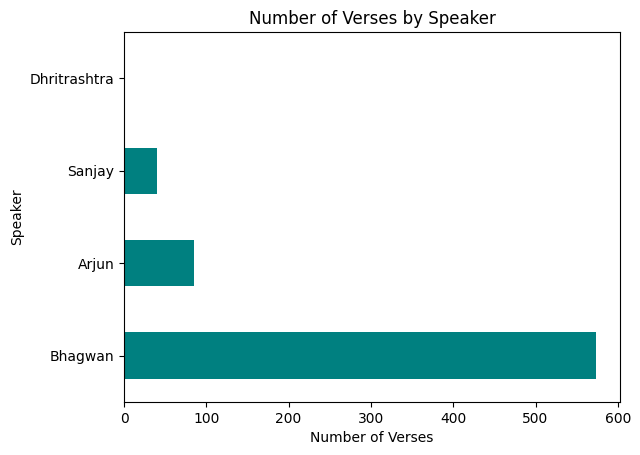

In [72]:
speaker_counts = verses_english['Speaker'].value_counts()
print("Speaker distribution:\n", speaker_counts)

speaker_counts.plot(kind='barh', color='teal')
plt.title("Number of Verses by Speaker")
plt.xlabel("Number of Verses")
plt.ylabel("Speaker")
plt.show()

In [73]:
verses_english['Sanskrit '][0]

'धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः| मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय  || 1.1 || '

In [74]:
verses_english['Sanskrit '] = verses_english['Sanskrit '].apply(lambda x: re.sub(r'\|\|\s*\d+\.\d+\s*\|\|', '', x))

In [75]:
verses_english['Sanskrit '][0]

'धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः| मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय   '

In [76]:
verses_english['Sanskrit '] = verses_english['Sanskrit '].str.strip()

verses_english['Sanskrit '] = verses_english['Sanskrit '].apply(lambda x: re.sub(r'\s+', ' ', x))

In [77]:
verses_english['Sanskrit '][0]

'धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः| मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय'

In [79]:
verses_english.to_csv('gita_processed2.csv', index=False)